#  Affichage de 3 chaines d'une image (RVB) avec la librairie Open CV 

In [4]:
!pip install opencv-python-headless

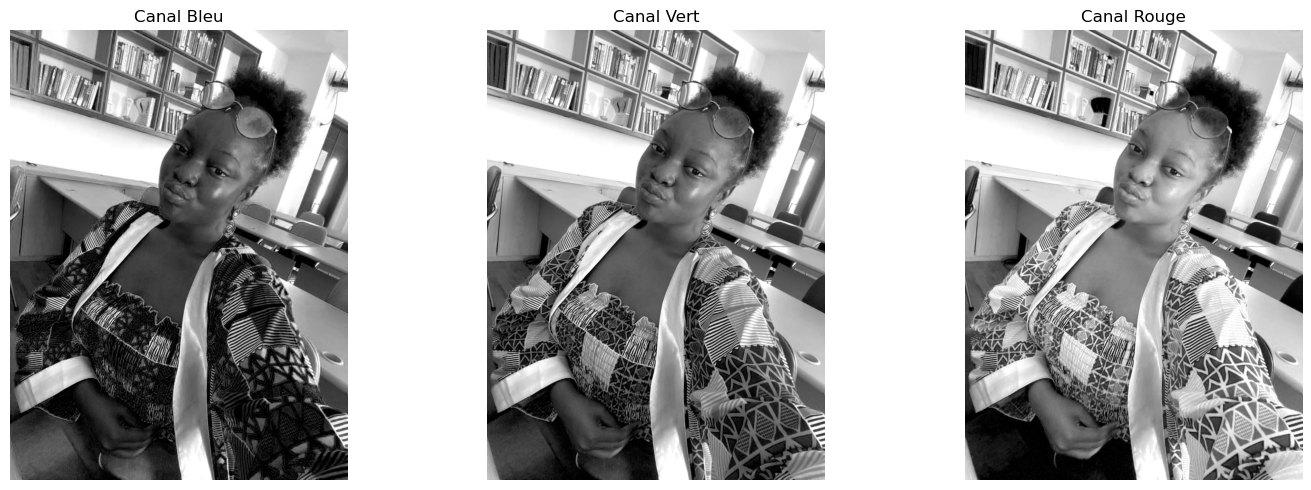

In [5]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image depuis le fichier
image_path = '/home/ericka/Pictures/Ericka.jpeg'
image = cv2.imread(image_path)

# Vérifier si l'image a été chargée correctement
if image is None:
    print("Impossible de charger l'image.")
else:
    # Diviser l'image en canaux RVB
    blue_channel, green_channel, red_channel = cv2.split(image)

    # Afficher les canaux individuellement
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(blue_channel, cmap='gray')
    plt.title('Canal Bleu')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(green_channel, cmap='gray')
    plt.title('Canal Vert')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(red_channel, cmap='gray')
    plt.title('Canal Rouge')
    plt.axis('off')

    plt.tight_layout()
    plt.show()



#  L'histogramme:
Il représente la distribution des niveaux de gris (ou de couleurs) dans une image

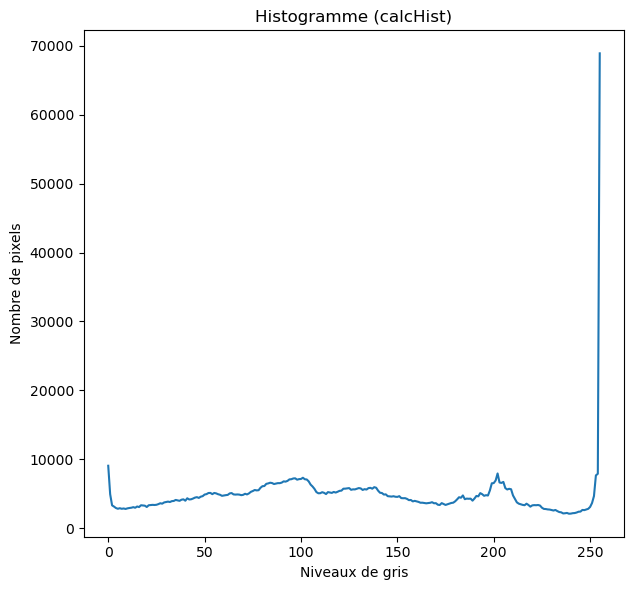

In [6]:
import cv2
import matplotlib.pyplot as plt

# Chargement de l'image depuis le fichier
image_path = '/home/ericka/Pictures/Ericka.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger en niveaux de gris

# Utilisation de la fonction calcHist de OpenCV
hist_method1 = cv2.calcHist([image], [0], None, [256], [0, 256])


# Affichage de l'histogramme
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(hist_method1)
plt.title('Histogramme (calcHist)')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')


plt.tight_layout()
plt.show()


# Luminance ou Brillance de l'image
Il s'agit de la moyenne des niveaux de gris de l'image

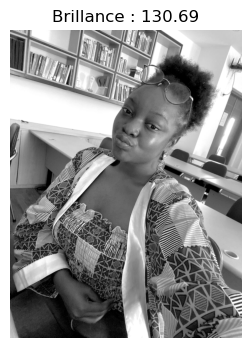

In [12]:
import numpy as np

# Calcul de la brillance
brightness = np.mean(image)


# Affichage de la brillance
plt.figure(figsize=(6, 4))

plt.imshow(image, cmap='gray')
plt.title(f'Brillance : {brightness:.2f}')
plt.axis('off')

plt.show()


# Contraste de l'image

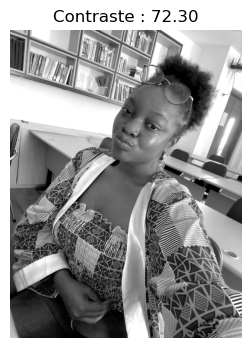

In [13]:
# Calcul le contraste
contrast = np.std(image)

# Affichage de l'image avec la valeur du contraste
plt.figure(figsize=(6, 4))

plt.imshow(image, cmap='gray')
plt.title(f'Contraste : {contrast:.2f}')
plt.axis('off')

plt.show()


# METHODES D'AMELIORATION DE LA LUMINOSITÉ ET DU CONTRASTE DE L'IMAGE

# 1- Egalisation de l'histogramme

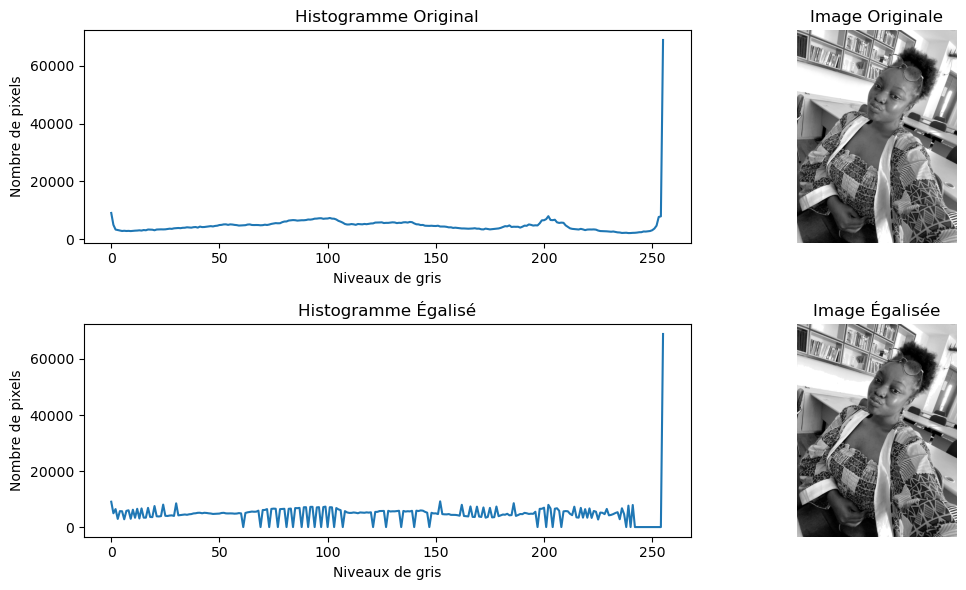

In [14]:
# Calcul de l'histogramme original
hist_original, bins = np.histogram(image.ravel(), bins=256, range=[0, 256])

# Appliquer l'égalisation d'histogramme
equ_image = cv2.equalizeHist(image)

# Calcul l'histogramme égalisé
hist_equalized, _ = np.histogram(equ_image.ravel(), bins=256, range=[0, 256])

# Affichage de l'histogramme original et égalisé
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.plot(hist_original)
plt.title('Histogramme Original')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')

plt.subplot(222)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(223)
plt.plot(hist_equalized)
plt.title('Histogramme Égalisé')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')

plt.subplot(224)
plt.imshow(equ_image, cmap='gray')
plt.title('Image Égalisée')
plt.axis('off')

plt.tight_layout()
plt.show()

INTERPRETATION: Ce code calcule l'égalisation de l'histogramme de l'image en utilisant la fonction cv2.equalizeHist d'OpenCV. Il affiche ensuite l'histogramme original et égalisé, ainsi que les images correspondantes. Cela permet de visualiser la différence entre l'histogramme original et celui après égalisation.

# 2- Transformation linéaire
La transformation linéaire d'une image consiste à appliquer une fonction linéaire aux valeurs des pixels pour ajuster leur contraste ou leur luminosité.

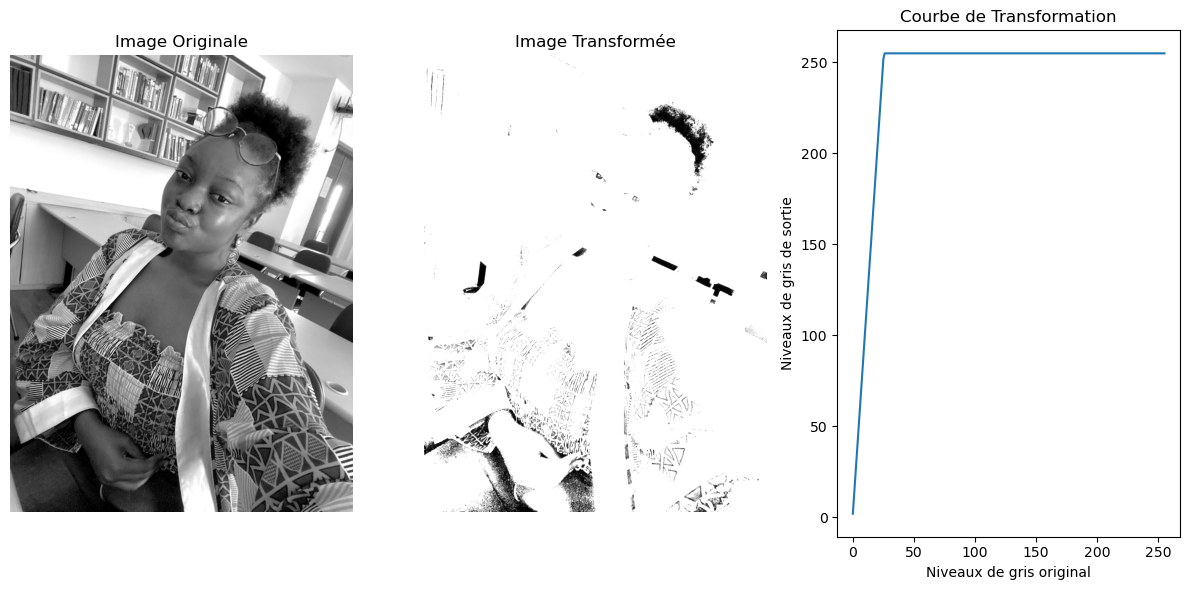

In [26]:
# Paramètres de la transformation linéaire
alpha = 10 # Facteur de contraste
beta = 2 # Facteur de luminosité

# Appliquer la transformation linéaire
transformed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Créer la courbe de transformation
x = np.arange(256)
y = np.clip(alpha * x + beta, 0, 255)  # Clip les valeurs pour rester dans le domaine [0, 255]

# Afficher l'image originale et transformée
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(132)
plt.imshow(transformed_image, cmap='gray')
plt.title('Image Transformée')
plt.axis('off')

plt.subplot(133)
plt.plot(x, y)
plt.title('Courbe de Transformation')
plt.xlabel('Niveaux de gris original')
plt.ylabel('Niveaux de gris de sortie')

plt.tight_layout()
plt.show()

INTERPRETATION: Dans ce code, nous utilisons la fonction cv2.convertScaleAbs d'OpenCV pour appliquer la transformation linéaire à l'image. Les paramètres alpha et beta ajustent respectivement le contraste et la luminosité de l'image transformée. Nous affichons ensuite l'image originale et transformée côte à côte à l'aide de Matplotlib. Nous pouvons ajuster les valeurs de alpha et beta pour obtenir l'effet de transformation linéaire souhaité.

# 3- Transformation linéaire avec saturation
La transformation linéaire avec saturation d'une image permet d'ajuster le contraste tout en maintenant les valeurs des pixels dans une plage spécifiée pour éviter la surexposition ou la sous-exposition

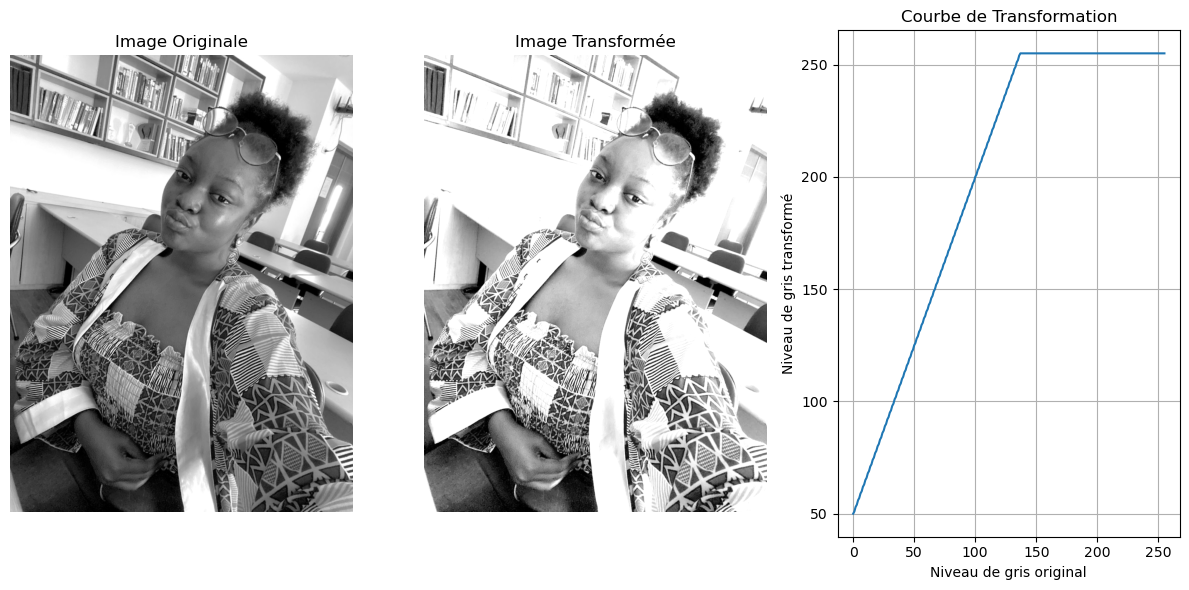

In [53]:
# Paramètres de la transformation linéaire avec saturation
alpha = 1.5  # Facteur de contraste
beta = 50   # Facteur de luminosité

# Appliquer la transformation linéaire avec saturation
transformed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Calculer la courbe de transformation
original_range = np.arange(256)
transformed_range = np.clip(alpha * original_range + beta, 0, 255).astype(np.uint8)

# Afficher l'image originale, transformée et la courbe de transformation
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(132)
plt.imshow(transformed_image, cmap='gray')
plt.title('Image Transformée')
plt.axis('off')

plt.subplot(133)
plt.plot(original_range, transformed_range)
plt.title('Courbe de Transformation')
plt.xlabel('Niveau de gris original')
plt.ylabel('Niveau de gris transformé')
plt.grid()

plt.tight_layout()
plt.show()

INTERPRETATION: Dans ce code, nous utilisons la fonction cv2.convertScaleAbs d'OpenCV pour appliquer la transformation linéaire avec saturation à l'image. Les paramètres alpha et beta ajustent respectivement le contraste et la luminosité de l'image transformée. La courbe de transformation est calculée à l'aide de NumPy et est affichée en utilisant Matplotlib. La fonction np.clip est utilisée pour s'assurer que les valeurs résultantes de la transformation restent dans la plage des valeurs de 0 à 255.

# 4- Transformation linéaire par morceaux
La transformation linéaire par morceaux consiste à appliquer des fonctions linéaires différentes à différentes plages de valeurs de pixels dans une image

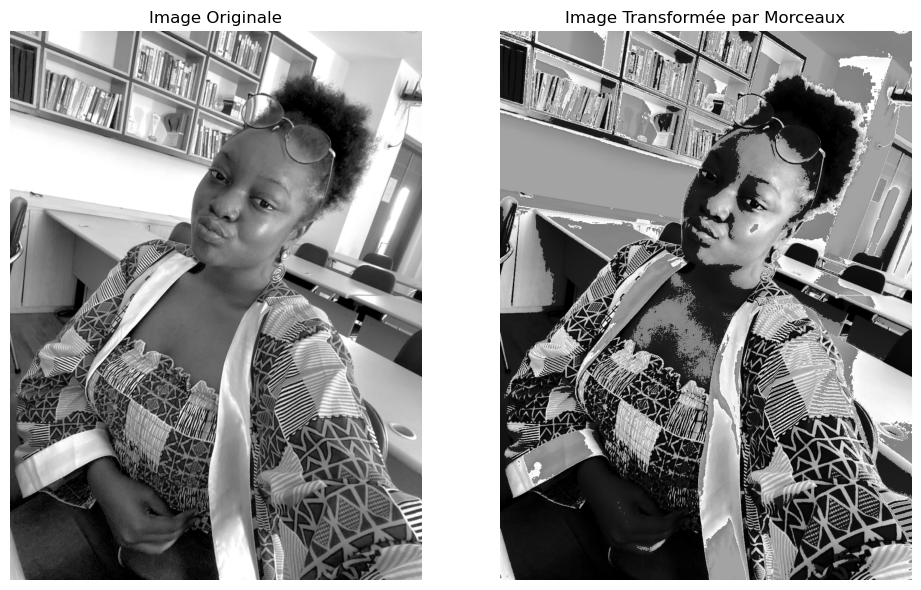

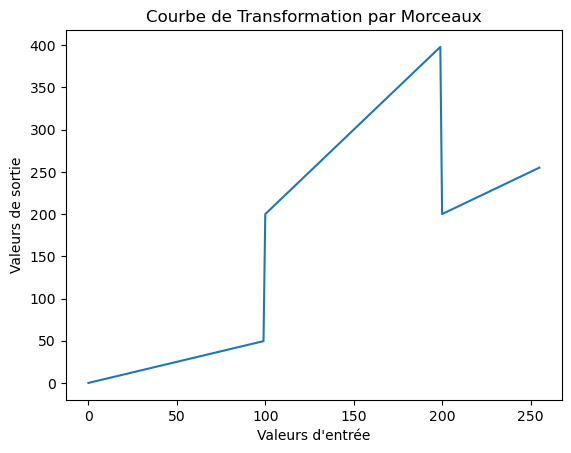

In [56]:
# Paramètres de la transformation linéaire par morceaux
threshold1 = 100
threshold2 = 200
alpha1 = 0.5
alpha2 = 2.0
beta1 = 0
beta2 = 0

# Appliquer la transformation linéaire par morceaux
def piecewise_linear_transform(pixel_value):
    if pixel_value < threshold1:
        return alpha1 * pixel_value + beta1
    elif pixel_value < threshold2:
        return alpha2 * pixel_value + beta2
    else:
        return pixel_value

transformed_image = np.vectorize(piecewise_linear_transform)(image)

# Afficher l'image originale et transformée
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(122)
plt.imshow(transformed_image, cmap='gray')
plt.title('Image Transformée par Morceaux')
plt.axis('off')

plt.tight_layout()
plt.show()

# Afficher la courbe de transformation
x = np.arange(256)
y = np.vectorize(piecewise_linear_transform)(x)

plt.plot(x, y)
plt.title('Courbe de Transformation par Morceaux')
plt.xlabel('Valeurs d\'entrée')
plt.ylabel('Valeurs de sortie')
plt.show()

INTERPETATION: Dans ce code, nous définissons une fonction piecewise_linear_transform qui applique différentes fonctions linéaires à différentes plages de valeurs de pixels en fonction des seuils (threshold1 et threshold2) et des paramètres d'ajustement (alpha1, alpha2, beta1 et beta2). Ensuite, nous utilisons np.vectorize pour appliquer cette transformation à chaque pixel de l'image. Nous affichons l'image originale et l'image transformée par morceaux côte à côte, puis nous affichons la courbe de transformation. Nous pouvons ajuster les seuils et les paramètres d'ajustement pour obtenir l'effet souhaité.

# 5- Transformation non linéaire: correction gamma 

# 5-1- Pour gamma<1

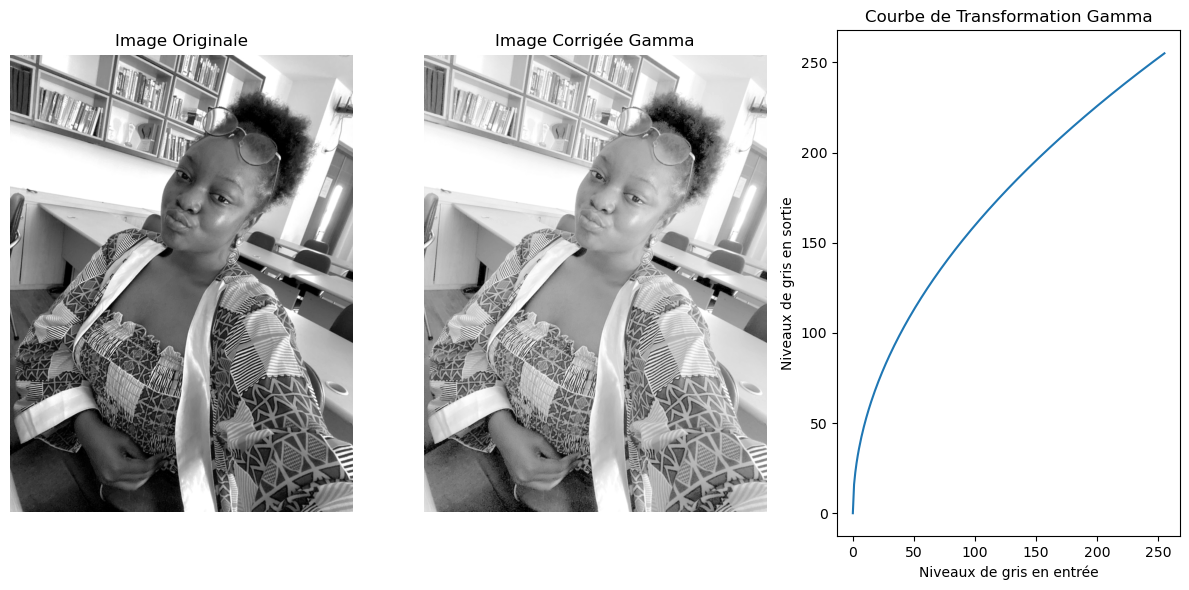

In [33]:
# Paramètre de correction gamma
gamma = 0.5

# Appliquer la correction gamma
gamma_corrected_image = np.power(image / 255.0, gamma)
gamma_corrected_image = np.uint8(gamma_corrected_image * 255)

# Créer la courbe de transformation
x = np.arange(256)
y = np.power(x / 255.0, gamma) * 255

# Afficher l'image originale et corrigée
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(132)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Image Corrigée Gamma')
plt.axis('off')

plt.subplot(133)
plt.plot(x, y)
plt.title('Courbe de Transformation Gamma')
plt.xlabel('Niveaux de gris en entrée')
plt.ylabel('Niveaux de gris en sortie')

plt.tight_layout()
plt.show()

INTERPRETATION: Ce code applique la correction gamma à l'image en utilisant la formule output = (input / 255.0) ^ gamma, où gamma est le paramètre de correction gamma. Le résultat est l'image corrigée gamma et la courbe de transformation gamma affichée dans le notebook. Pour gamma<1, l'image sera plus clair tandis que pour gamma>1, l'image sera plus foncée

# 5-2- Pour gamma>1

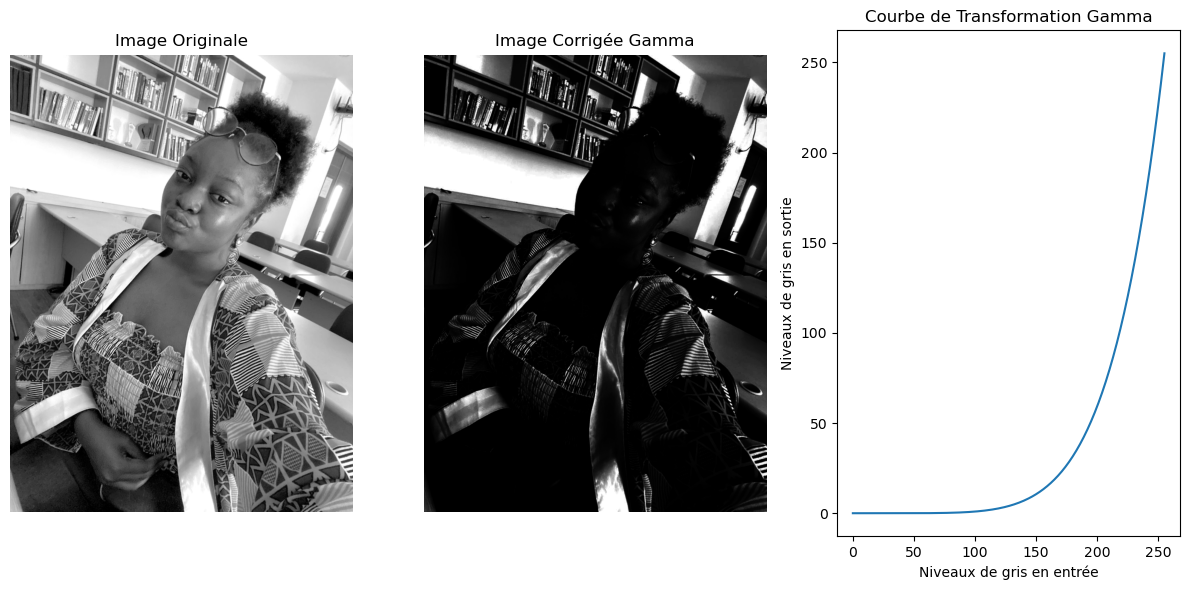

In [35]:
# Paramètre de correction gamma
gamma = 6

# Appliquer la correction gamma
gamma_corrected_image = np.power(image / 255.0, gamma)
gamma_corrected_image = np.uint8(gamma_corrected_image * 255)

# Créer la courbe de transformation
x = np.arange(256)
y = np.power(x / 255.0, gamma) * 255

# Afficher l'image originale et corrigée
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(132)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Image Corrigée Gamma')
plt.axis('off')

plt.subplot(133)
plt.plot(x, y)
plt.title('Courbe de Transformation Gamma')
plt.xlabel('Niveaux de gris en entrée')
plt.ylabel('Niveaux de gris en sortie')

plt.tight_layout()
plt.show()